# Grantee Data Analysis

In [1]:
import pandas as pd
import numpy as np
import wmfdata as wmf
from wmfdata import charting, mariadb, hive
from wmfdata.utils import pct_str, pd_display_all

In [2]:
participants_tally_2019 = pd.read_csv("../../data/processed/participants_list_received_clean/2019/participants_tally_2019.csv", sep=',', encoding = 'utf-8')

In [3]:
participants_tally_2018 = pd.read_csv("../../data/processed/participants_list_received_clean/2018/PTP_participants_grantees_article_counts_clean.csv", sep=',', encoding = 'utf-8')

In [4]:
# read data from inner join of 2019 and 2018 participants: participants in this year's GLOW a) that also were grantees b) that were also participants last year
participants_last_grantees = pd.read_csv("../../data/processed/participants_list_received_clean/2019/participants_last_grantees.csv", sep=',', encoding = 'utf-8')
participants_last_participants = pd.read_csv("../../data/processed/participants_list_received_clean/2019/participants_last_participants.csv", sep=',', encoding = 'utf-8')

### GLOW signup

In [5]:
participants_tally_2019['glow_editor_signup'].value_counts()

True     328
False     34
Name: glow_editor_signup, dtype: int64

In [6]:
participants_tally_2018['glow_editor_signup'].value_counts()

True     291
False     27
Name: glow_editor_signup, dtype: int64

In [7]:
participants_tally_2019.groupby(['incentive_recipient','glow_editor_signup'])['total_articles'].describe()

count       mean         std  min  \
incentive_recipient glow_editor_signup                                      
False               True                268.0  33.070896  184.395456  1.0   
True                False                34.0  10.764706   61.197672  0.0   
                    True                 60.0  76.316667  134.414675  1.0   

                                        25%   50%   75%     max  
incentive_recipient glow_editor_signup                           
False               True                1.0   3.5  15.0  2880.0  
True                False               0.0   0.0   0.0   357.0  
                    True                6.0  19.5  78.5   635.0

In [8]:
participants_tally_2019.loc[(participants_tally_2019['incentive_recipient']==True) & (participants_tally_2019['glow_editor_signup']==True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 4 to 348
Data columns (total 5 columns):
username               60 non-null object
incentive_recipient    60 non-null bool
incentive_type         60 non-null object
glow_editor_signup     60 non-null bool
total_articles         60 non-null float64
dtypes: bool(2), float64(1), object(2)
memory usage: 2.0+ KB


### incentive_recipient

In [9]:
participants_tally_2019['incentive_recipient'].value_counts()

False    268
True      94
Name: incentive_recipient, dtype: int64

In [10]:
participants_tally_2018['incentive_recipient'].value_counts()

False    252
True      66
Name: incentive_recipient, dtype: int64

### incentive_type count

In [11]:
participants_tally_2019['incentive_type'].value_counts()

0                  268
internet            43
laptop_internet     36
laptop              15
Name: incentive_type, dtype: int64

In [12]:
participants_tally_2018['incentive_type'].value_counts()

0                  252
laptop_internet     28
laptop              22
internet            16
Name: incentive_type, dtype: int64

### Create a mask for GLOW editors

In [13]:
glow_2019_m = participants_tally_2019['glow_editor_signup']==True
glow_2018_m = participants_tally_2018['glow_editor_signup']==True

In [14]:
g18 = participants_tally_2018.loc[glow_2018_m]
g19 = participants_tally_2019.loc[glow_2019_m]

glow_2019 = g19.copy()
glow_2018 = g18.copy()

In [15]:
glow_2019['incentive_recipient'].value_counts()

False    268
True      60
Name: incentive_recipient, dtype: int64

### output by incentive - broad

In [16]:
glow_2019.groupby('incentive_recipient')['total_articles'].sum()

incentive_recipient
False    8863.0
True     4579.0
Name: total_articles, dtype: float64

In [17]:
glow_2018.groupby('incentive_recipient')['article_count'].sum()

incentive_recipient
False    2830.0
True     1904.0
Name: article_count, dtype: float64

### output by incentive - detailed

In [18]:
glow_2019.groupby('incentive_type')['total_articles'].sum().sort_values()

incentive_type
laptop             1013.0
laptop_internet    1385.0
internet           2181.0
0                  8863.0
Name: total_articles, dtype: float64

In [19]:
glow_2018.groupby('incentive_type')['article_count'].sum().sort_values()

incentive_type
laptop_internet     223.0
internet            321.0
laptop             1360.0
0                  2830.0
Name: article_count, dtype: float64

### Descriptive statistics

In [20]:
glow_2019.groupby('incentive_type')['total_articles'].describe()

,count,mean,std,min,25%,50%,75%,max
incentive_type,,,,,,,,
0,268.0,33.070896,184.395456,1.0,1.0,3.5,15.0,2880.0
internet,25.0,87.240000,174.627289,1.0,5.0,14.0,37.0,635.0
laptop,8.0,126.625000,169.814973,5.0,9.0,46.0,199.0,492.0
laptop_internet,27.0,51.296296,59.519108,1.0,7.0,21.0,79.0,212.0


In [21]:
glow_2018.groupby('incentive_type')['article_count'].describe()

,count,mean,std,min,25%,50%,75%,max
incentive_type,,,,,,,,
0,252.0,11.230159,28.256695,1.0,1.00,3.0,10.0,328.0
internet,9.0,35.666667,59.222040,1.0,3.00,8.0,43.0,182.0
laptop,16.0,85.000000,136.072530,0.0,5.00,24.5,110.5,431.0
laptop_internet,14.0,15.928571,16.083744,0.0,2.75,8.0,26.5,47.0


In [22]:
#2019: 8,863 (not including 2880 from single high output editor = 5983
8863-2880

5983

In [23]:
bins = [0, 1, 5, 10, 25, 50, 100, 300, 600, 1000, 2000, 3000]
participants_output_binned_2019 = pd.cut(glow_2019['total_articles'], bins=bins).value_counts()
participants_output_binned_2018 = pd.cut(glow_2018['article_count'], bins=bins).value_counts()

In [24]:
participants_output_binned_2019

(1, 5]          91
(0, 1]          76
(5, 10]         44
(10, 25]        38
(25, 50]        29
(100, 300]      22
(50, 100]       21
(300, 600]       5
(2000, 3000]     1
(600, 1000]      1
(1000, 2000]     0
Name: total_articles, dtype: int64

In [25]:
participants_output_binned_2019.plot();

In [26]:
participants_output_binned_2018

(1, 5]          95
(0, 1]          89
(10, 25]        40
(5, 10]         28
(25, 50]        17
(50, 100]       11
(100, 300]       6
(300, 600]       3
(2000, 3000]     0
(1000, 2000]     0
(600, 1000]      0
Name: article_count, dtype: int64

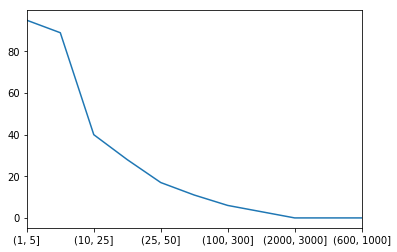

In [27]:
participants_output_binned_2018.plot();

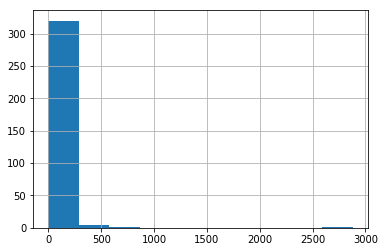

In [28]:
glow_2019['total_articles'].hist();

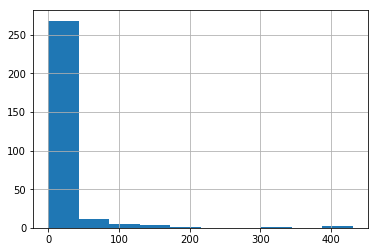

In [29]:
glow_2018['article_count'].hist();

### Review

In [30]:
P2019 = (glow_2019.groupby(['incentive_type', 'incentive_recipient'], sort=False)['total_articles']
        .agg([('incentive_count', 'count'),('articles_total', 'sum')])
        .reset_index())

P2019['articles_pct'] = 100 * P2019['articles_total']  / P2019['articles_total'].sum()

In [31]:
P2019

,incentive_type,incentive_recipient,incentive_count,articles_total,articles_pct
0,0,False,268,8863.0,65.935129
1,laptop_internet,True,27,1385.0,10.303526
2,internet,True,25,2181.0,16.225264
3,laptop,True,8,1013.0,7.536081


In [32]:
P2019.sort_values(by='articles_pct', ascending=False)

,incentive_type,incentive_recipient,incentive_count,articles_total,articles_pct
0,0,False,268,8863.0,65.935129
2,internet,True,25,2181.0,16.225264
1,laptop_internet,True,27,1385.0,10.303526
3,laptop,True,8,1013.0,7.536081


In [33]:
P2018 = (glow_2018.groupby(['incentive_type', 'incentive_recipient'], sort=False)['article_count']
        .agg([('incentive_count', 'count'),('articles_total', 'sum')])
        .reset_index())

P2018['articles_pct'] = 100 * P2018['articles_total']  / P2018['articles_total'].sum()

In [34]:
P2018

,incentive_type,incentive_recipient,incentive_count,articles_total,articles_pct
0,0,False,252,2830.0,59.780313
1,laptop_internet,True,14,223.0,4.710604
2,internet,True,9,321.0,6.780735
3,laptop,True,16,1360.0,28.728348


In [35]:
P2018.sort_values(by='articles_pct', ascending=False)

,incentive_type,incentive_recipient,incentive_count,articles_total,articles_pct
0,0,False,252,2830.0,59.780313
3,laptop,True,16,1360.0,28.728348
2,internet,True,9,321.0,6.780735
1,laptop_internet,True,14,223.0,4.710604


### Questions

How many of this year's participants participated last year? 
> 82

How many of this year's participants were grantees last year?
> 30

How many of this year's editor grantees were editor grantees last year?
> 11 (9 of these received internet in GLOW)

*Does one incentive outperform another?*
Incentive performance, as far as articles submitted, is roughly correlated with the frequency of that incentive. 
The fewer counts of an incentive, the fewer total articles that will be associated with that incentive.

How did returning editors perform?
> 38 wrote less

> 3 wrote the same amount

> 41 wrote more

In [36]:
bins2 = [0, 1, 5, 99, 300, 3000]
names = ['<2', '2-5', '6-99', '100-300', '301+']

z = pd.cut(glow_2019['total_articles'], bins=bins2, labels=names).value_counts()
z18 = pd.cut(glow_2018['article_count'], bins=bins2, labels=names).value_counts()

In [37]:
z

6-99       132
2-5         91
<2          76
100-300     22
301+         7
Name: total_articles, dtype: int64

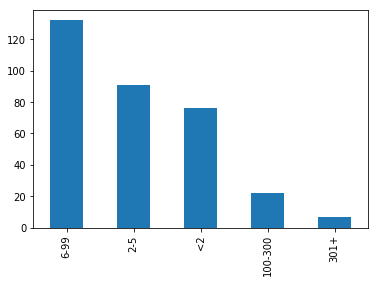

In [38]:
z.plot(kind='bar');

In [39]:
z18

6-99       95
2-5        95
<2         89
100-300     7
301+        3
Name: article_count, dtype: int64

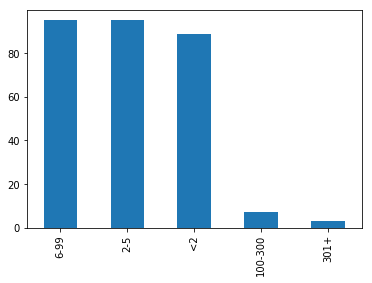

In [40]:
z18.plot(kind='bar');

In [41]:
glow_2019['article_cnt_range'] = pd.cut(glow_2019['total_articles'], bins2, labels=names)
glow_2018['article_cnt_range'] = pd.cut(glow_2018['article_count'], bins2, labels=names)

#participants_tally_2019['binned'] = pd.cut(glow_2019['total_articles'], bins)

In [46]:
glow_18s = glow_2018[['username', 'article_count']]
glow_19s = glow_2019[['username', 'total_articles']]

#common participants 
cp = participants_last_participants.merge(glow_18s, how='left', on='username')
cp = cp.merge(glow_19s, how='left', on='username')
cp.fillna(0)

#add columns
cp['pct_change_output'] =100 * cp[['article_count', 'total_articles']].pct_change(axis=1)['total_articles']
cp['article_cnt_range18'] = pd.cut(cp['article_count'], bins2, labels=names)
cp['article_cnt_range19'] = pd.cut(cp['total_articles'], bins2, labels=names)

In [127]:
change_matrix = cp.groupby('pp_inctv').pct_change_output.apply(lambda x: pd.Series([(x < 0).sum(), (x == 0).sum(), (x > 0).sum()])).unstack().reset_index().rename(columns={0:'-',
                                                                                                                                                                          1 : '=%',
                                                                                                                                                                         2:'+%',
                                                                                                                                                                         })


In [128]:
change_matrix

,pp_inctv,-,=%,+%
0,0,25,2,31
1,internet,3,1,2
2,laptop,5,0,7
3,laptop_internet,5,0,1


In [129]:
change_matrix.sum(numeric_only=True)

-     38
=%     3
+%    41
dtype: int64

In [140]:
sig_change_matrix = cp.groupby('pp_inctv').pct_change_output.apply(lambda x: pd.Series([(x >=20).sum(), (x >=50).sum(),(x >=100).sum()])).unstack().reset_index().rename(columns={
                              0 : '>25%',
                             1:'>75%',
                            2:'>100%',
                             })

In [141]:
sig_change_matrix

,pp_inctv,>25%,>75%,>100%
0,0,29,27,22
1,internet,2,2,1
2,laptop,5,4,3
3,laptop_internet,1,1,1


In [142]:
sig_change_matrix.sum(numeric_only=True)

>25%     37
>75%     34
>100%    27
dtype: int64

Did returning grantees perform similarly this year?
>2018 laptop recipients(10):
7 increased output; 5 decreased output
7 received internet grants in 2019

>2018 laptop_internet recipients (6):
1 increased output; 5 decreased output
1 received internet grant in 2019

>2018 internet recipients(6):
2 increased output; 1 maintained output; 3 decreased output
2 received laptop_internet grants; 1 received internet in 2019


did the contest borrow productivity from a future period?
>unlikely

did the contest change future behavior? 
>maybe for subsets of editors

did we change the edit trajectory of editors via inclusion in glow generally?
>more research is needed where we look at groups of editors based on their edit count bins

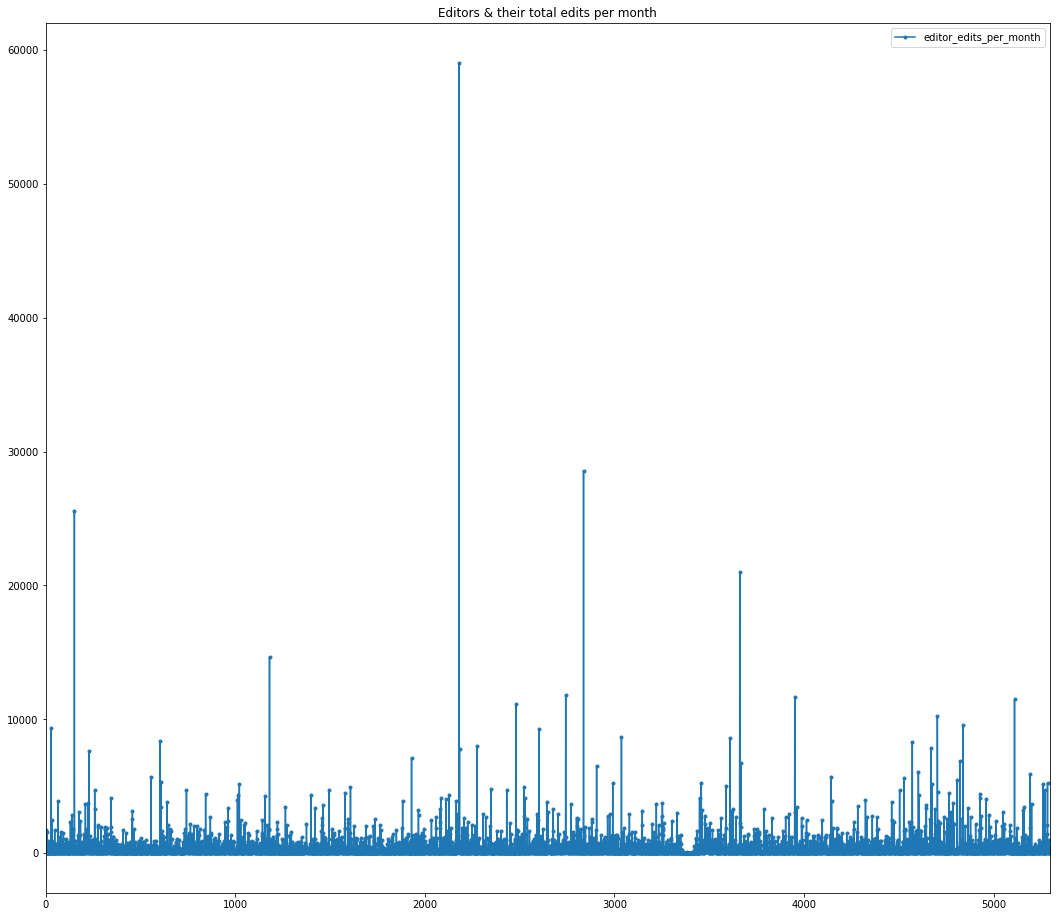

In [57]:
GLOW_editor_edits_summed.plot(style='.-', 
                              figsize=(18, 16), 
                              title='Editors & their total edits per month'
                             );

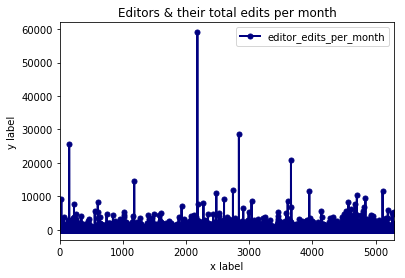

In [58]:
ax = GLOW_editor_edits_summed.plot(lw=2, 
                                   colormap='jet', 
                                   marker='.', 
                                   markersize=10, 
                                   title='Editors & their total edits per month')
ax.set_xlabel("x label")
ax.set_ylabel("y label")

In [34]:
GLOW_editor_edits = GLOW_editor_edits.set_index('event_timestamp')
total_edits_by_date_r = GLOW_editor_edits[['event_user_text']]
total_edits_by_date = total_edits_by_date_r.groupby(total_edits_by_date_r.index.date).count().rename(columns={'event_user_text':'occurrences_by_date'})

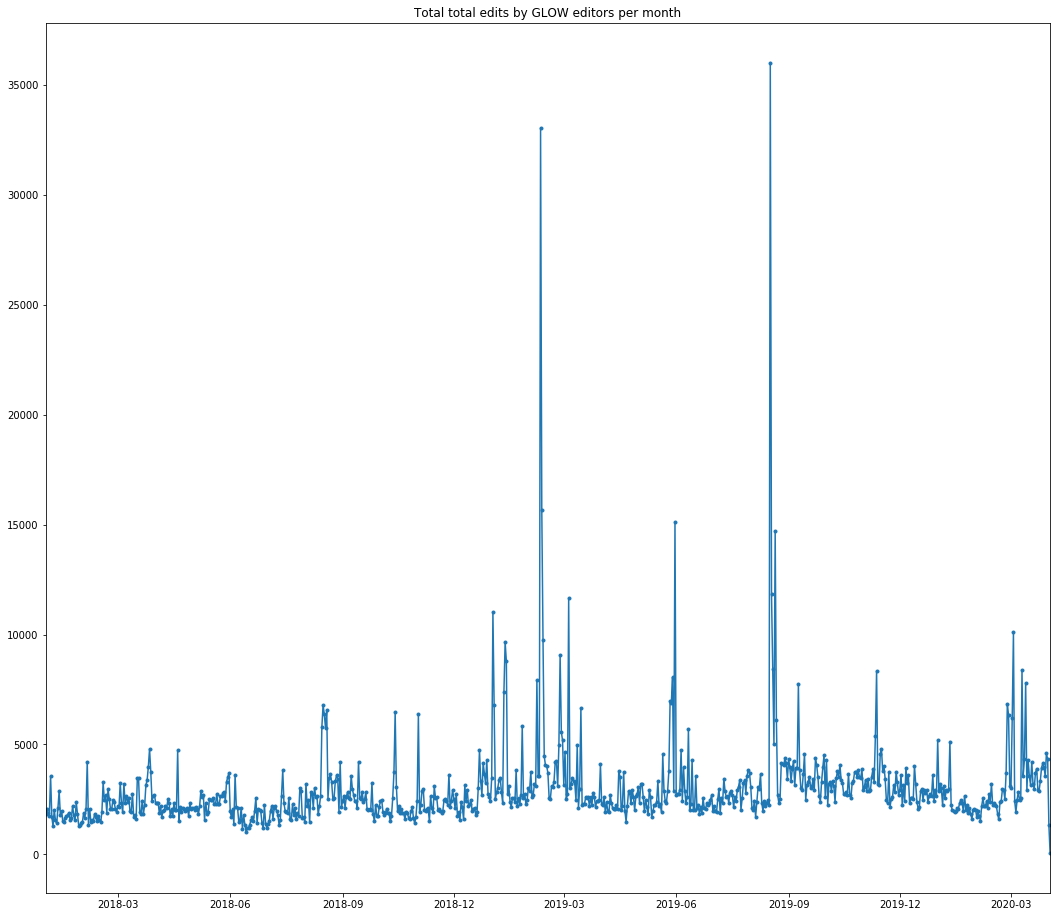

In [61]:
%matplotlib inline
total_edits_by_date['occurrences_by_date'].plot(style='.-', 
                                                figsize=(18, 16),
                                               title='Total total edits by GLOW editors per month');
#fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

did we change the edit trajectory of editors by giving them grants?